<a href="https://colab.research.google.com/github/dawidkubicki/movie_review_neural_classifier/blob/main/movie_review_neural_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.4.3'

### Import movie reviews from IMDB


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

### Limit to 10000 most used words

In [5]:
max([max(sequence) for sequence in train_data])

9999

### Check how dataset look like (with words)

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Turn data into zero one matrix vector

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 # replace indexes of those words with 1
  return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Build Neural Network

In [10]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Add optimizer, loss_function and metrics

In [11]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=['acc'])

### Split train data to validation data as well

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train it and save data to history

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5356 - acc: 0.8005 - val_loss: 0.4216 - val_acc: 0.8659
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3348 - acc: 0.9005 - val_loss: 0.3223 - val_acc: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2443 - acc: 0.9227 - val_loss: 0.2843 - val_acc: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1914 - acc: 0.9393 - val_loss: 0.2771 - val_acc: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1553 - acc: 0.9517 - val_loss: 0.3120 - val_acc: 0.8772
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1286 - acc: 0.9605 - val_loss: 0.2856 - val_acc: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1092 - acc: 0.9673 - val_loss: 0.3001 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0878 - a

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Let's plot loss function and val_loss 

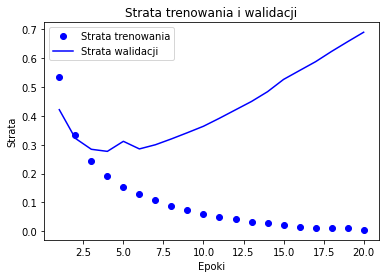

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Parametr bo definiuje linię przerywaną w postaci niebieskich kropek.
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# Parametr b definiuje ciągłą niebieską linię.
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

### Now plot accuracy of training and validation

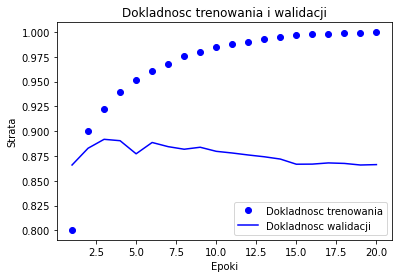

In [17]:
plt.clf()   # Czyszczenie rysunku.
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()